In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense, Flatten
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os 

# To load a file use the format [/mnt/c/path/to/file]
# data = np.load(r'/mnt/c/Users/John/Documents/Datasets/task7/task7_X_train.npy')
x_train = np.load(r"/mnt/c/Windows/System32/repos/thesis_raw_data/task5/task5_X_train.npy")
y_train = np.load(r"/mnt/c/Windows/System32/repos/thesis_raw_data/task5/task5_y_train.npy")

x_test = np.load(r"/mnt/c/Windows/System32/repos/thesis_raw_data/task5/task5_X_test.npy")
y_test = np.load(r"/mnt/c/Windows/System32/repos/thesis_raw_data/task5/task5_y_test.npy")
print(x_train.shape)

vgg16_model = VGG16(include_top = False,
            weights = 'imagenet', 
            input_tensor = None, 
            input_shape = (224,224,3), #shape of npy file data
            pooling = None,
            classes = 1000,
            classifier_activation="softmax") 
num_classes = 3
batch_size = 16
num_epochs = 10

# Do not retrain convolutional layers
for layer in vgg16_model.layers:
    layer.trainable = False

input_shape = keras.Input(shape=(224, 224, 3))

# Add new fully connected layers
x = Flatten()(vgg16_model.output)
x = Dense(2048, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)  # num_classes is the number of classes in your dataset

# Create a new model with the fully connected layers added
model = Model(inputs=vgg16_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create an instance of ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
                            #  rotation_range=20,
                            #  width_shift_range=0.1,
                            #  height_shift_range=0.1,
                            #  shear_range=0.2,
                            #  zoom_range=0.2,
                            #  horizontal_flip=True
                             )

# Fit the ImageDataGenerator on the training data
datagen.fit(x_train)

# Create generators for the training and validation data
train_generator = datagen.flow(x_train,
                               y_train, 
                               batch_size=batch_size,
                               shuffle=True
                               )
                               
test_generator = datagen.flow(x_test, 
                              y_test, 
                              batch_size=batch_size,
                              shuffle=False)

# Use the generators to train the model
history = model.fit(train_generator,
          epochs=num_epochs,
          steps_per_epoch= len(train_generator) // batch_size,
          validation_data=test_generator)

# Save the trained model
model.save('vgg16_trained.h5')

(1226, 224, 224, 3)


2023-03-23 14:22:29.715681: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-23 14:22:30.312308: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-23 14:22:30.312378: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-23 14:22:30.315537: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, 

Epoch 1/10


2023-03-23 14:22:44.215275: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8400
2023-03-23 14:22:50.777883: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.54GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-03-23 14:22:50.778858: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.54GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-03-23 14:22:51.936815: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-23 14:22:52.024697: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1

4/4 [==============================] - ETA: 0s - loss: 112.5820 - accuracy: 0.4844

2023-03-23 14:22:54.646701: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.09GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-03-23 14:22:54.646762: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.09GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-03-23 14:22:54.785324: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.08GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-03-23 14:22:54.785412: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU

4/4 [==============================] - 18s 541ms/step - loss: 112.5820 - accuracy: 0.4844 - val_loss: 52.2457 - val_accuracy: 0.4589
Epoch 2/10
4/4 [==============================] - 1s 270ms/step - loss: 30.1221 - accuracy: 0.5625 - val_loss: 6.5031 - val_accuracy: 0.5890
Epoch 3/10
4/4 [==============================] - 1s 271ms/step - loss: 10.6566 - accuracy: 0.5000 - val_loss: 8.7296 - val_accuracy: 0.6301
Epoch 4/10
4/4 [==============================] - 2s 534ms/step - loss: 7.3009 - accuracy: 0.5938 - val_loss: 13.3945 - val_accuracy: 0.4110
Epoch 5/10
4/4 [==============================] - 1s 301ms/step - loss: 5.7189 - accuracy: 0.5781 - val_loss: 7.9653 - val_accuracy: 0.6164
Epoch 6/10
4/4 [==============================] - 1s 277ms/step - loss: 4.0705 - accuracy: 0.7031 - val_loss: 2.6373 - val_accuracy: 0.7123
Epoch 7/10
4/4 [==============================] - 1s 386ms/step - loss: 4.0939 - accuracy: 0.6875 - val_loss: 3.7962 - val_accuracy: 0.5890
Epoch 8/10
4/4 [========

list of val_accuracy is [0.45890411734580994, 0.5890411138534546, 0.6301369667053223, 0.4109589159488678, 0.6164383292198181, 0.7123287916183472, 0.5890411138534546, 0.6917808055877686, 0.5410959124565125, 0.664383590221405]
5


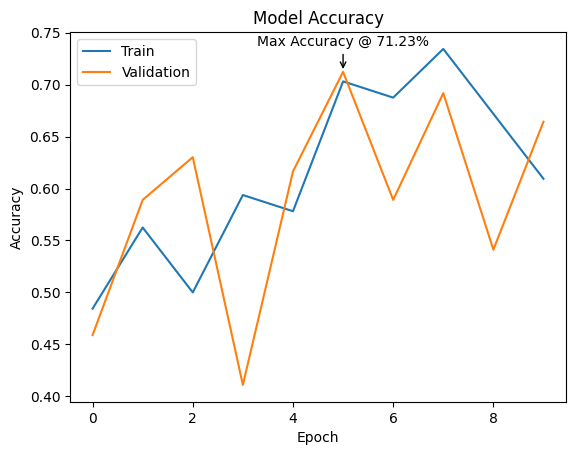

2.6372756958007812


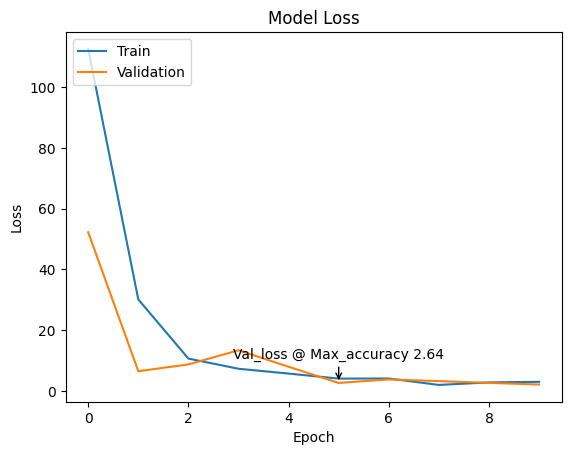

In [28]:

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

print("list of val_accuracy is", history.history['val_accuracy'])
#Find the x and y position of the highest test accuracy
#list all val_accuracy values
list = history.history['val_accuracy']

#find highest val_accuracy
ymax =  max(history.history['val_accuracy'])

#find index of highest val_accuracy
xpos = list.index(max(history.history['val_accuracy']))
print(xpos)
# Annotation for max accuracy
plt.annotate('Max Accuracy @ {}%'.format(round(ymax*100,2)), xy=(xpos, ymax), xytext=(xpos, ymax+.025), ha = 'center', 
             arrowprops=dict(arrowstyle="->", facecolor='black'))
#Show plot             
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

#list all val_loss values
list_val_loss = history.history['val_loss']

#find val_loss of highest val_accuracy
# yval =  max(history.history['val_accuracy'])

#val_loss of highest val_accuracy
yval = list_val_loss[xpos]

print(yval)

# print (list[xpos])
# Annotation for max accuracy
plt.annotate('Val_loss @ Max_accuracy {}'.format(round(yval,2)), xy=(xpos, yval), xytext=(xpos, ymax+10), ha = 'center', 
             arrowprops=dict(arrowstyle="->", facecolor='black'))

plt.show()

In [13]:
i=0 
x=[]
a = [1,2,3,4]
while i < len(a):
    x.append(i)
    i+=1
print(x)
print (a[2])

[0, 1, 2, 3]
3
